Datos sobre los precios de casas en diferentes barrios en el estado de California. Las columnas de datos son los siguientes (Pace & Barry, 1997):

longitude: Coordenada longitudinal del barrio

latitude: Coordenada latitudinal del barrio

housing_median_age: Antiguedad mediana de las casas del barrio.

total_rooms: Número total de habitaciones en el barrio

total_bedrooms: Número de dormitorios totales en el barrio

population: Población en el barrio

households: Número total de casas que hay en el barrio

median_income: Mediana del ingreso de las personas que viven en el barrio

median_house_value: Mediana del precio de las casas en el barrio

ocean_proximity: Proximidad del oceano

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('housing.csv')
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [2]:
X = dataset[['longitude', 'latitude', 'median_income']]
y = dataset['median_house_value']

In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
Xsc = sc.fit_transform(X)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xsc, y, test_size=0.2, random_state=5)

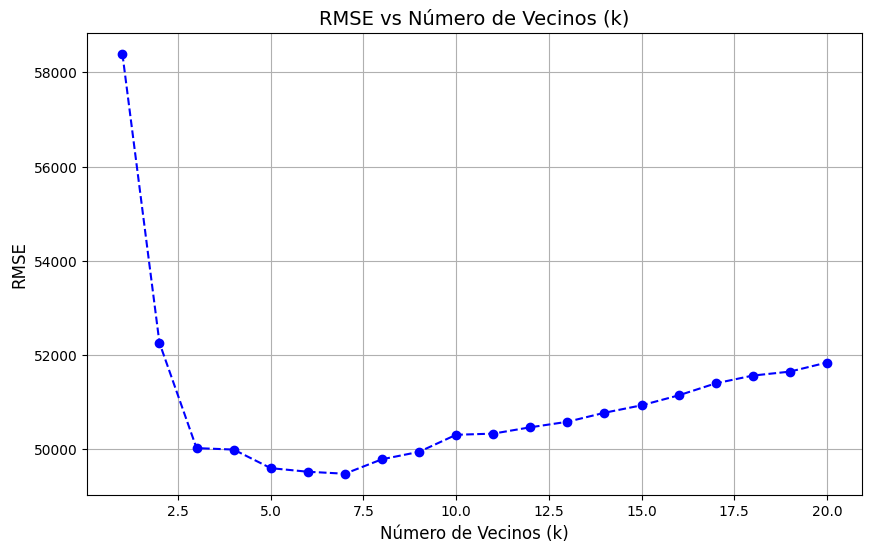

Mejor valor de k: 7 con RMSE = 49476.64


In [5]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Buscando el mejor valor de k
rmse_valores = []
k_valores = range(1, 21)

for k in k_valores:
    modelo = KNeighborsRegressor(n_neighbors=k)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_valores.append(rmse)

plt.figure(figsize=(10, 6))
plt.plot(k_valores, rmse_valores, marker='o', linestyle='--', color='b')
plt.title('RMSE vs Número de Vecinos (k)', fontsize=14)
plt.xlabel('Número de Vecinos (k)', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.grid(True)
plt.show()

mejor_k = k_valores[np.argmin(rmse_valores)] # np.argmin busca el índice del valor más bajo en la lista rmse_valores
print(f"Mejor valor de k: {mejor_k} con RMSE = {min(rmse_valores):.2f}")

In [6]:
modelo = KNeighborsRegressor(n_neighbors = mejor_k)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(" Modelo final con mejor k")
print(" RMSE:", rmse)
print(" MAE:", mae)
print(" R^2 :", r2)

 Modelo final con mejor k
 RMSE: 49476.6361364256
 MAE: 31236.015849944626
 R^2 : 0.8225726002028682


In [7]:
import joblib

joblib.dump(modelo, 'KNN_modelo.pkl')
print("Modelo KNN guardado como KNN_modelo.pkl")

# Guradando el scaler para usarlo en Flask
joblib.dump(sc, 'scaler.pkl')
print("Scaler guardado como scaler.pkl")

Modelo KNN guardado como KNN_modelo.pkl
Scaler guardado como scaler.pkl


In [8]:
import joblib
joblib.dump(modelo, 'knn_model.pkl')
print("Modelo exportado correctamente")

Modelo exportado correctamente
